In [14]:
from keras import layers
from keras.models import Sequential

In [15]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 186624)            0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [16]:
from keras import optimizers
model.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(learning_rate=0.001), metrics = ["accuracy"])

In [17]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_directory = "/content/drive/MyDrive/123R008/dataset/test"
validation_directory = "/content/drive/MyDrive/123R008/dataset/test"

train_generator = train_datagen.flow_from_directory(train_directory, target_size=(224,224), batch_size=16, class_mode="categorical")
validation_generator = validation_datagen.flow_from_directory(validation_directory, target_size=(224,224), batch_size=16, class_mode="categorical")

Found 2136 images belonging to 3 classes.
Found 2136 images belonging to 3 classes.


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, batch_size=16)

Epoch 1/20
134/134 [==============================] - 459s 3s/step - loss: 1.7256 - accuracy: 0.4485 - val_loss: 0.9689 - val_accuracy: 0.5964
Epoch 2/20
134/134 [==============================] - 359s 3s/step - loss: 1.0959 - accuracy: 0.5145 - val_loss: 0.8938 - val_accuracy: 0.6016
Epoch 3/20
134/134 [==============================] - 349s 3s/step - loss: 0.9734 - accuracy: 0.5693 - val_loss: 0.7857 - val_accuracy: 0.7144
Epoch 4/20
134/134 [==============================] - 360s 3s/step - loss: 0.8537 - accuracy: 0.6390 - val_loss: 0.5588 - val_accuracy: 0.7767
Epoch 5/20
134/134 [==============================] - 411s 3s/step - loss: 0.7441 - accuracy: 0.7308 - val_loss: 0.4023 - val_accuracy: 0.8446
Epoch 6/20
134/134 [==============================] - 346s 3s/step - loss: 0.5514 - accuracy: 0.7940 - val_loss: 0.3246 - val_accuracy: 0.8600
Epoch 7/20
134/134 [==============================] - 343s 3s/step - loss: 0.5757 - accuracy: 0.8305 - val_loss: 0.2251 - val_accuracy: 0.9237

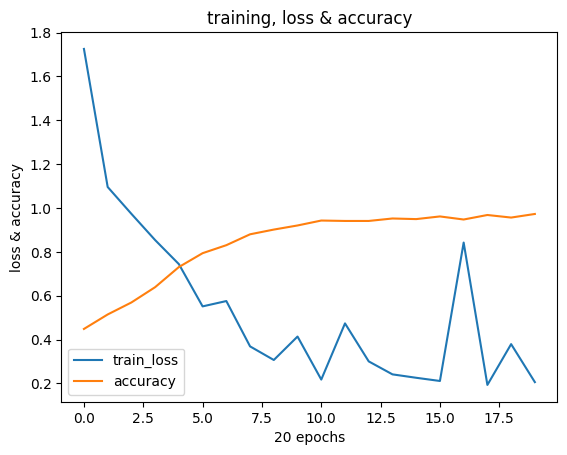

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
epochs = 20
plt.plot(np.arange(0,epochs), history.history["loss"], label="train_loss")

plt.plot(np.arange(0,epochs), history.history["accuracy"], label="accuracy")

plt.title("training, loss & accuracy")
plt.xlabel("20 epochs")
plt.ylabel("loss & accuracy")
plt.legend(loc="lower left")

In [21]:
model.save("/content/drive/MyDrive/deprem_tur.h5")